In [1]:
import pandas as pd
df = pd.read_csv('./Iris.csv')
df = df.drop('Id',axis=1)

In [2]:
from sklearn import preprocessing

if df.Species.dtype == 'object':
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(df.Species.values))
    df.Species = lbl.transform(list(df.Species.values))
    
print(df.Species.dtype)

int64


In [5]:
from sklearn.model_selection import train_test_split

Y = df.Species.values
X = df.drop(['Species'],axis=1).values

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.20, random_state=27)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()
NaiveBayesModel = gnb.fit(x_train, y_train)
y_pred = NaiveBayesModel.predict(x_test)
accuracy_score(y_test, y_pred)

0.9

In [6]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test,y_pred)
print(con_mat)

[[ 7  0  0]
 [ 0 10  1]
 [ 0  2 10]]


In [7]:
from sklearn import svm

from sklearn.metrics import average_precision_score

x_train, x_test, y_train, y_test = train_test_split(X[Y<2],Y[Y<2], test_size= 0.95)

classifier = svm.LinearSVC(random_state=27)
classifier.fit(x_train, y_train)
y_score = classifier.decision_function(x_test)

average_precision = average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 1.00


In [8]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

classifier = svm.SVC(kernel='linear', random_state=27)
classifier.fit(x_train, y_train)
y_score = classifier.decision_function(x_test)

print('Average precision-recall score:',average_precision_score(y_test, y_score))
precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')

Average precision-recall score: 1.0000000000000002


Text(0,0.5,'Precision')

Average precision-recall score: 1.0


Text(0,0.5,'Precision')

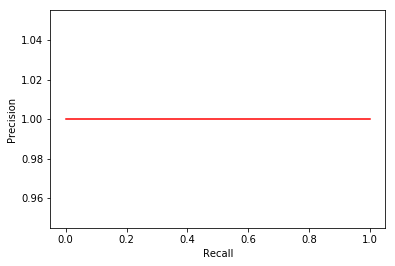

In [9]:
classifier = svm.SVC(kernel='poly', random_state=27)
classifier.fit(x_train, y_train)
y_score = classifier.decision_function(x_test)

print('Average precision-recall score:',average_precision_score(y_test, y_score))
precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')

Average precision-recall score: 1.0


Text(0,0.5,'Precision')

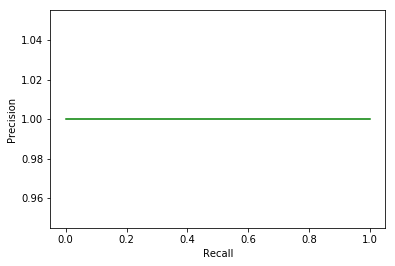

In [10]:
classifier = svm.SVC(kernel='rbf', random_state=27)
classifier.fit(x_train, y_train)
y_score = classifier.decision_function(x_test)

print('Average precision-recall score:',average_precision_score(y_test, y_score))
precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='g')
plt.xlabel('Recall')
plt.ylabel('Precision')